In [17]:
#女團資料前處理
import pandas as pd

file_path = 'kpop_girl_groups.csv'
girlgroups_data = pd.read_csv(file_path, encoding='ISO-8859-1')
girlgroups_data['Average_age'].fillna(pd.NA, inplace=True)

girlgroups_data['Debut'] = pd.to_datetime(girlgroups_data['Debut'], errors='coerce')
girlgroups_data['Debut_year'] = girlgroups_data['Debut'].dt.year
girlgroups_data['month'] = girlgroups_data['Debut'].dt.month
girlgroups_data['year'] = girlgroups_data['Debut'].dt.year

columns_to_drop = ['Korean Name', 'Short']
girlgroups_data = girlgroups_data.drop(columns=columns_to_drop)

selected_columns = ['Name', 'Company', 'Members', 'Orig. Memb.', 'Average_age', 'year']
girlgroups_data = girlgroups_data[selected_columns]
print(girlgroups_data.head())

       Name  Company  Members  Orig. Memb.  Average_age  year
0  (G)I-DLE     Cube        6            6         20.0  2018
1       15&      JYP        2            2         15.0  2012
2     2EYES  SidusHQ        4            5         19.0  2013
3      2NE1       YG        4            4         21.0  2009
4       3YE       GH        3            3         21.0  2019


女團出道平均年齡最小的年份：1997，平均年齡：16.16
女團出道平均年齡最大的年份：2006，平均年齡：23.00


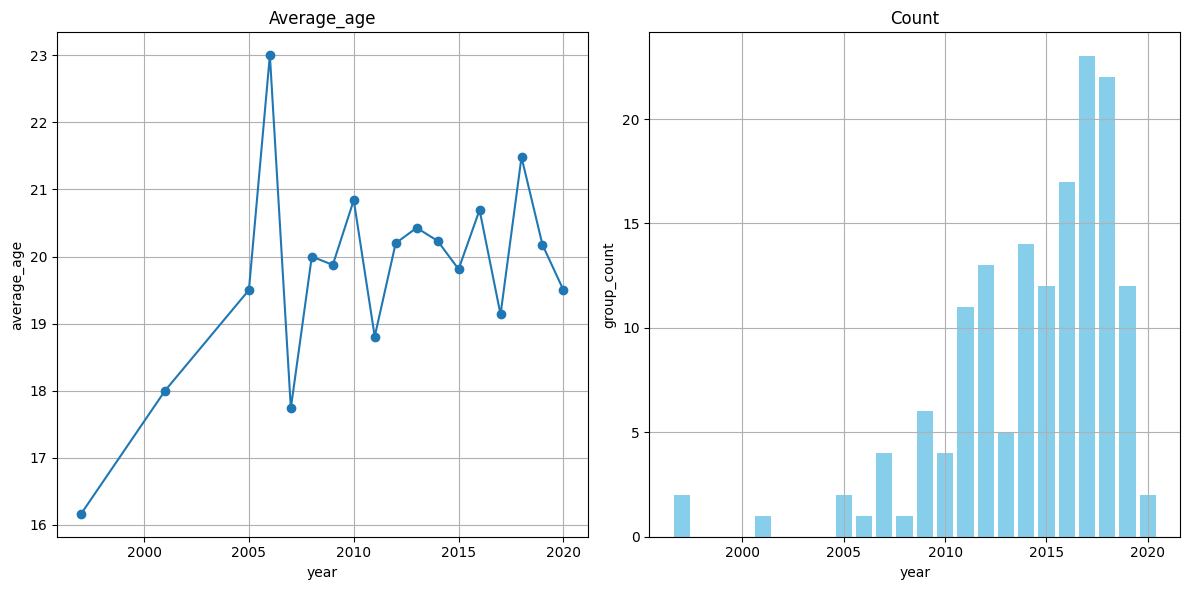

In [20]:
#繪製平均出道年齡的時間趨勢
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_age_by_year = girlgroups_data.groupby('year')['Average_age'].mean()
plt.plot(average_age_by_year.index, average_age_by_year.values, marker='o')
plt.title('Average_age')
plt.xlabel('year')
plt.ylabel('average_age')
plt.grid(True)

#印出出道平均年齡最小的年份與出道平均年齡最大的年份
min_avg_age_year = average_age_by_year.idxmin()
min_avg_age_value = average_age_by_year.min()
max_avg_age_year = average_age_by_year.idxmax()
max_avg_age_value = average_age_by_year.max()
print(f"女團出道平均年齡最小的年份：{min_avg_age_year}，平均年齡：{min_avg_age_value:.2f}")
print(f"女團出道平均年齡最大的年份：{max_avg_age_year}，平均年齡：{max_avg_age_value:.2f}")

#繪製出道組數的時間趨勢
plt.subplot(1, 2, 2)
girlgroup_count_by_year = girlgroups_data['year'].value_counts().sort_index()
plt.bar(girlgroup_count_by_year.index, girlgroup_count_by_year.values, color='skyblue')
plt.title('Count')
plt.xlabel('year')
plt.ylabel('group_count')
plt.grid(True)

plt.tight_layout()
plt.show()

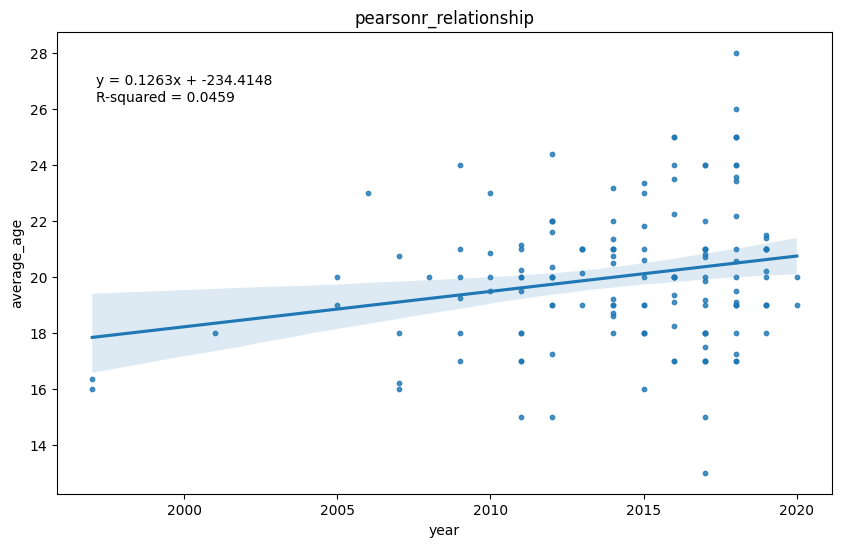

相關係數：0.2141
p-value：0.0087


In [33]:
#使用皮爾森相關係數(pearsonr)計算年份(year)與女團平均年齡(Average_age)之間的相關性
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr

slope, intercept, r_value, p_value, std_err = linregress(girlgroups_data['year'], girlgroups_data['Average_age'])

plt.figure(figsize=(10, 6))
sns.regplot(x='year', y='Average_age', data=girlgroups_data, scatter_kws={'s': 10})

plt.title('pearsonr_relationship')
plt.xlabel('year')
plt.ylabel('average_age')

girlgroups_data = girlgroups_data.dropna(subset=['year', 'Average_age'])
equation = f'y = {slope:.4f}x + {intercept:.4f}\nR-squared = {r_value**2:.4f}'
plt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=10)
plt.show()

correlation_coefficient, p_value = pearsonr(girlgroups_data['year'], girlgroups_data['Average_age'])
print(f'相關係數：{correlation_coefficient:.4f}')
print(f'p-value：{p_value:.4f}')

Spearman 相關係數：0.1421
p-value：0.0839


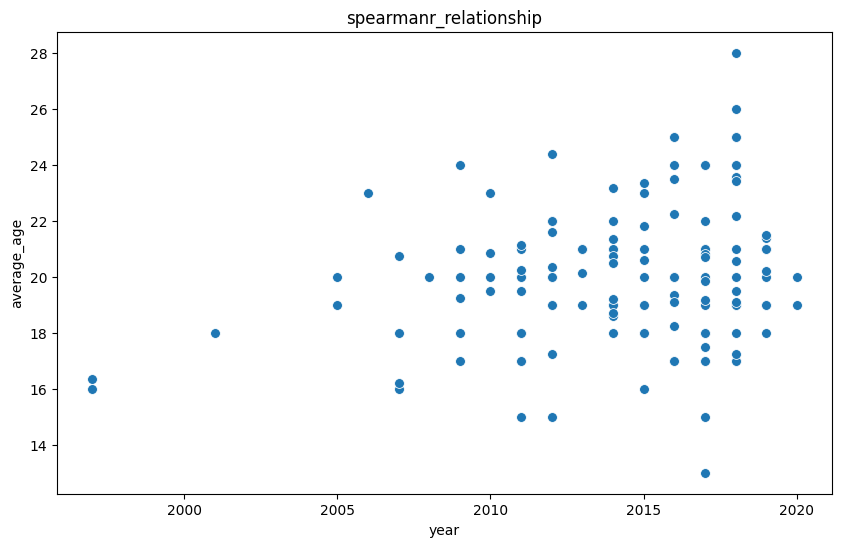

In [35]:
#使用斯皮爾曼等級相關係數(spearmanr)計算年份(year)與女團平均年齡(Average_age)之間的相關性
from scipy.stats import spearmanr

girlgroups_data_cleaned = girlgroups_data.dropna(subset=['year', 'Average_age'])
spearman_coefficient, spearman_p_value = spearmanr(girlgroups_data_cleaned['year'], girlgroups_data_cleaned['Average_age'])

print(f'Spearman 相關係數：{spearman_coefficient:.4f}')
print(f'p-value：{spearman_p_value:.4f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Average_age', data=girlgroups_data_cleaned, s=50)
plt.title('spearmanr_relationship')
plt.xlabel('year')
plt.ylabel('average_age')
plt.show()

Kendall 相關係數：0.1024
p-value：0.0826


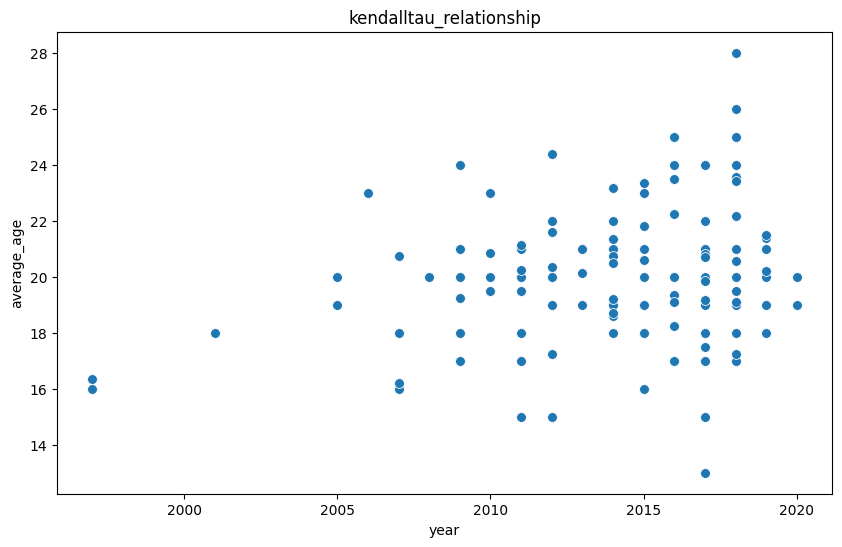

In [36]:
#使用肯德爾等級相關係數(Kendall)計算年份(year)與女團平均年齡(Average_age)之間的相關性
from scipy.stats import kendalltau

girlgroups_data_cleaned = girlgroups_data.dropna(subset=['year', 'Average_age'])
kendall_coefficient, kendall_p_value = kendalltau(girlgroups_data_cleaned['year'], girlgroups_data_cleaned['Average_age'])

print(f'Kendall 相關係數：{kendall_coefficient:.4f}')
print(f'p-value：{kendall_p_value:.4f}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='Average_age', data=girlgroups_data_cleaned, s=50)
plt.title('kendalltau_relationship')
plt.xlabel('year')
plt.ylabel('average_age')
plt.show()

女團平均年齡的中位數：20.00
女團平均年齡的四分位距：2.75


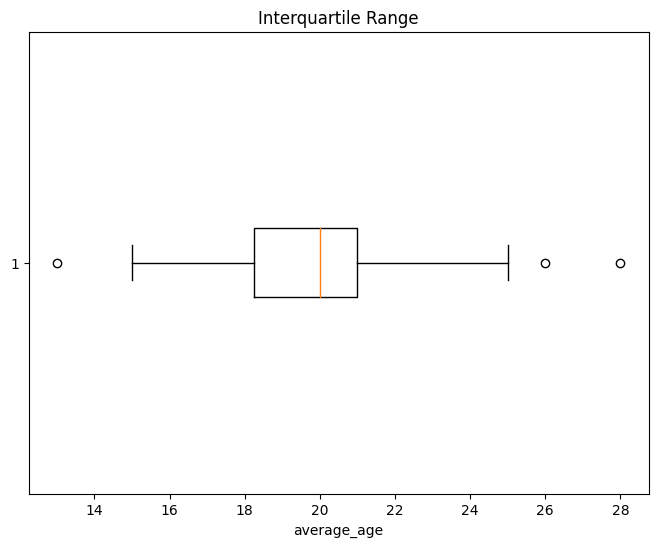

In [9]:
#計算女團平均年齡的中位數
median_age = girlgroups_data['Average_age'].median()
print(f'女團平均年齡的中位數：{median_age:.2f}')

#繪製女團平均年齡的四分位距與盒狀圖
q1 = girlgroups_data['Average_age'].quantile(0.25)
q3 = girlgroups_data['Average_age'].quantile(0.75)
iqr = q3 - q1
print(f'女團平均年齡的四分位距：{iqr:.2f}')
plt.figure(figsize=(8, 6))
plt.boxplot(girlgroups_data['Average_age'], vert=False)
plt.title('Interquartile Range')
plt.xlabel('average_age')
plt.show()

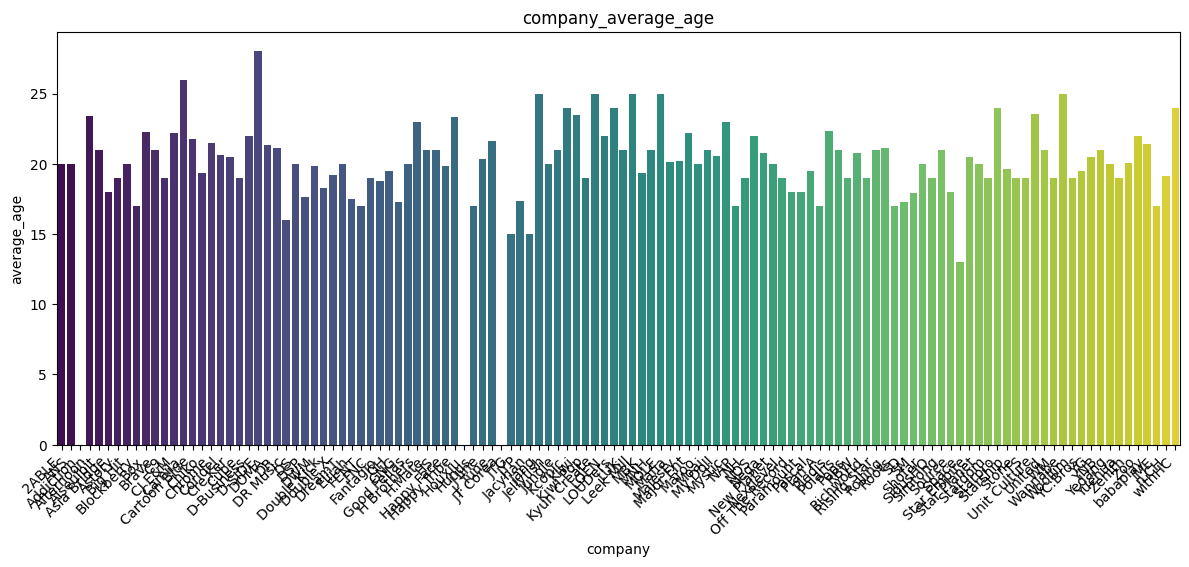

平均年齡最小的公司（前五名）：
Company
Space         13.0
JTG           15.0
Jacyhan       15.0
DR Music      16.0
Blockberry    17.0
Name: Average_age, dtype: float64

平均年齡最大的公司（前五名）：
Company
D-SIDE         28.0
Camila         26.0
Jang           25.0
Kyun Create    25.0
Leek Mill      25.0
Name: Average_age, dtype: float64


In [29]:
import seaborn as sns
girlgroups_data_cleaned = girlgroups_data.dropna(subset=['Company'])

#繪製各公司的女團平均年齡條狀圖
average_age_by_company = girlgroups_data.groupby('Company')['Average_age'].mean()
plt.figure(figsize=(12, 6))

sns.barplot(x=average_age_by_company.index, y=average_age_by_company.values, palette='viridis')
plt.title('company_average_age')
plt.xlabel('company')
plt.ylabel('average_age')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)
plt.show()

#印出平均年齡最小的公司（前五名）
min_avg_age_companies = average_age_by_company.nsmallest(5)
#印出平均年齡最大的公司（前五名）
max_avg_age_companies = average_age_by_company.nlargest(5)
print("平均年齡最小的公司（前五名）：")
print(min_avg_age_companies)
print("\n平均年齡最大的公司（前五名）：")
print(max_avg_age_companies)